In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [3]:
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [4]:
#학습 결과 plotting 함수
#loss 출력
def plot_loss(epochs, history):
    plt.figure(figsize=(7,6))
    plt.plot(range(1, epochs+1), history.history['loss'], label = 'Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label = 'Validation Loss')
    plt.title('loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [5]:
#학습 결과 plotting 함수
#accuracy 출력
def plot_accuracy(epochs, history):
    plt.figure(figsize=(7,6))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label = 'Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

#### 데이터 로딩

In [6]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼 파라미터, 변수 정의

In [16]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

#데이터개수
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]


#### 전처리
 - image : 0~1로 정규화
 - label : one hot encoding


In [17]:
X_train = (train_image/255.0).astype(np.float32)
X_test = (test_image/255.0).astype(np.float32)

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test), X_train.dtype

(0.0, 1.0, 0.0, 1.0, dtype('float32'))

In [18]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#### 데이터셋 생성

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)


#### 모델의 크기 변경

In [20]:
#smaller model
def create_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=8, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [21]:
model = create_small_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.8946 - accuracy: 0.7299 - val_loss: 0.4133 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3667 - accuracy: 0.8956 - val_loss: 0.3202 - val_accuracy: 0.9091
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3134 - accuracy: 0.9120 - val_loss: 0.2960 - val_accuracy: 0.9153
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2937 - accuracy: 0.9173 - val_loss: 0.2851 - val_accuracy: 0.9190
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.9202 - val_loss: 0.2768 - val_accuracy: 0.9206
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2735 - accuracy: 0.9223 - val_loss: 0.2748 - val_accuracy: 0.9224
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2675 - accuracy: 0.9242 - val_loss: 0.2714 - val_accuracy: 0.9224
Epoch 

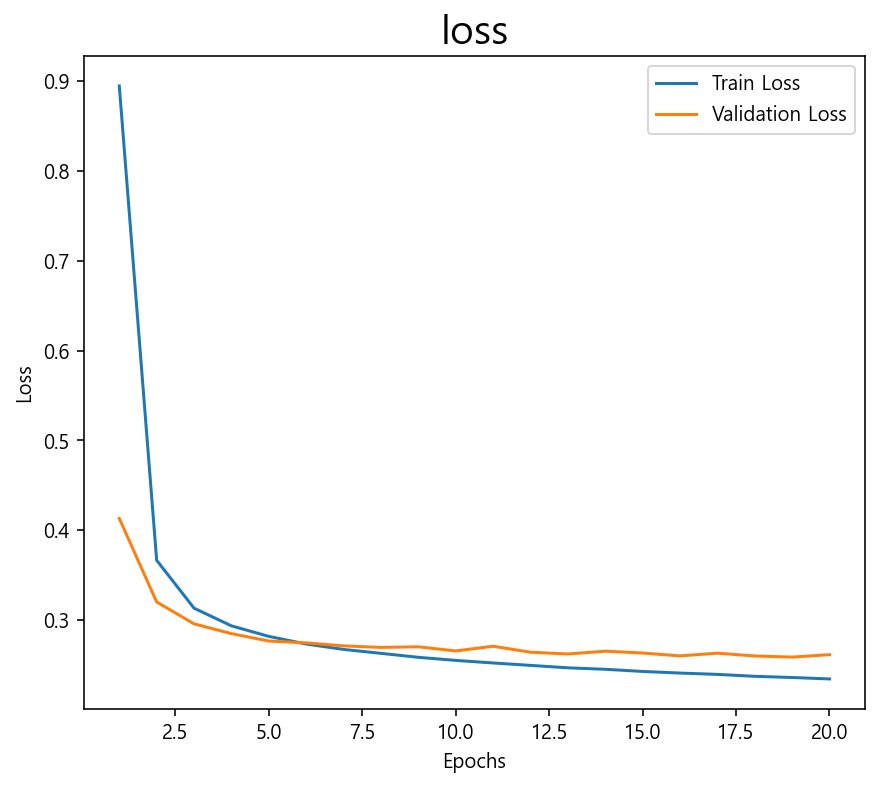

In [25]:
plot_loss(N_EPOCHS, hist)

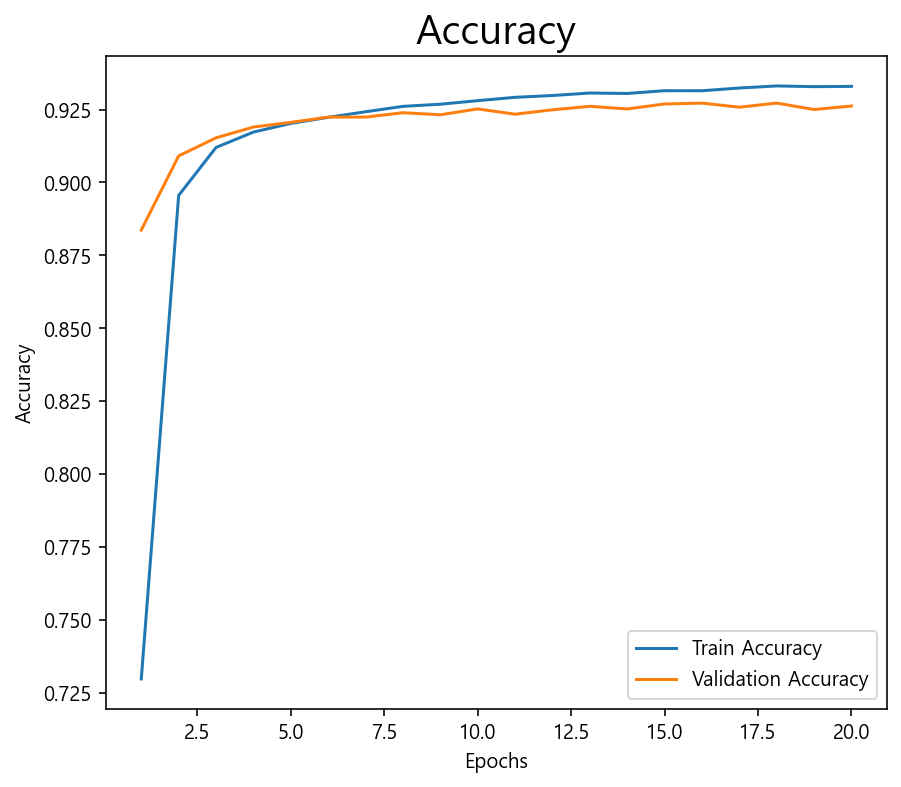

In [26]:
plot_accuracy(N_EPOCHS, hist)

In [27]:
#위의 모델 보다 큰 모델 
#hidden layer : Dense 4개 (unit : 256 256 128 128 activation : relu)
def create_bigger_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [28]:
model = create_bigger_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [30]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 0.2466 - accuracy: 0.9266 - val_loss: 0.1313 - val_accuracy: 0.9616
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0950 - accuracy: 0.9707 - val_loss: 0.1006 - val_accuracy: 0.9670
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0642 - accuracy: 0.9791 - val_loss: 0.0885 - val_accuracy: 0.9713
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0772 - val_accuracy: 0.9783
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0405 - accuracy: 0.9863 - val_loss: 0.0708 - val_accuracy: 0.9802
Epoch 6/20
600/600 [==============================] - 5s 7ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0850 - val_accuracy: 0.9766
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0857 - val_accuracy: 0.9785
Epoch 

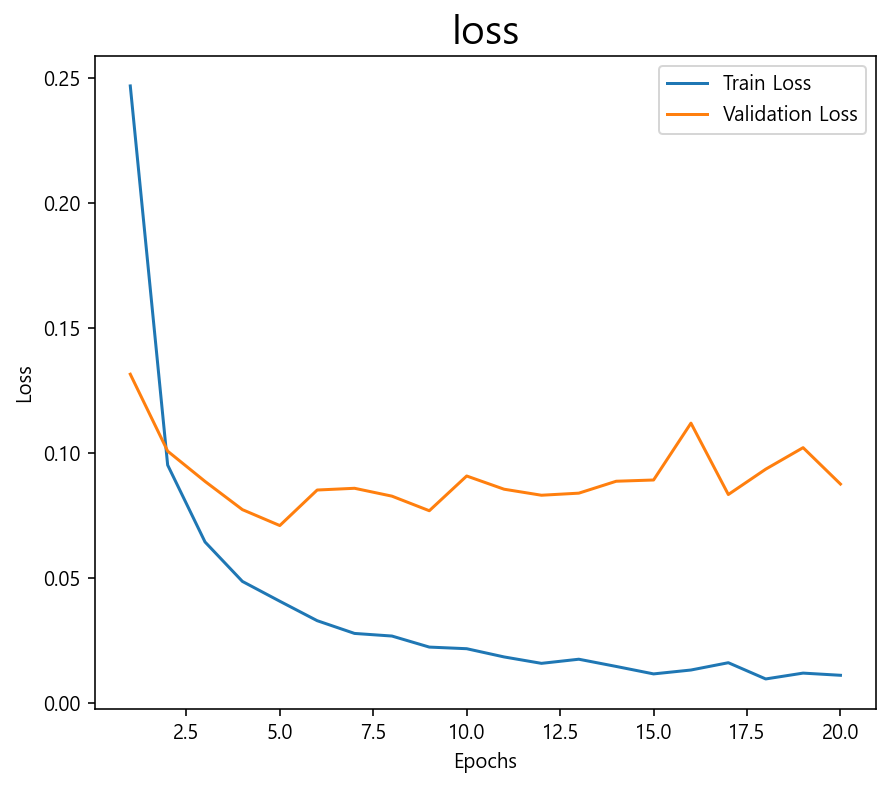

In [31]:
plot_loss(N_EPOCHS, hist)

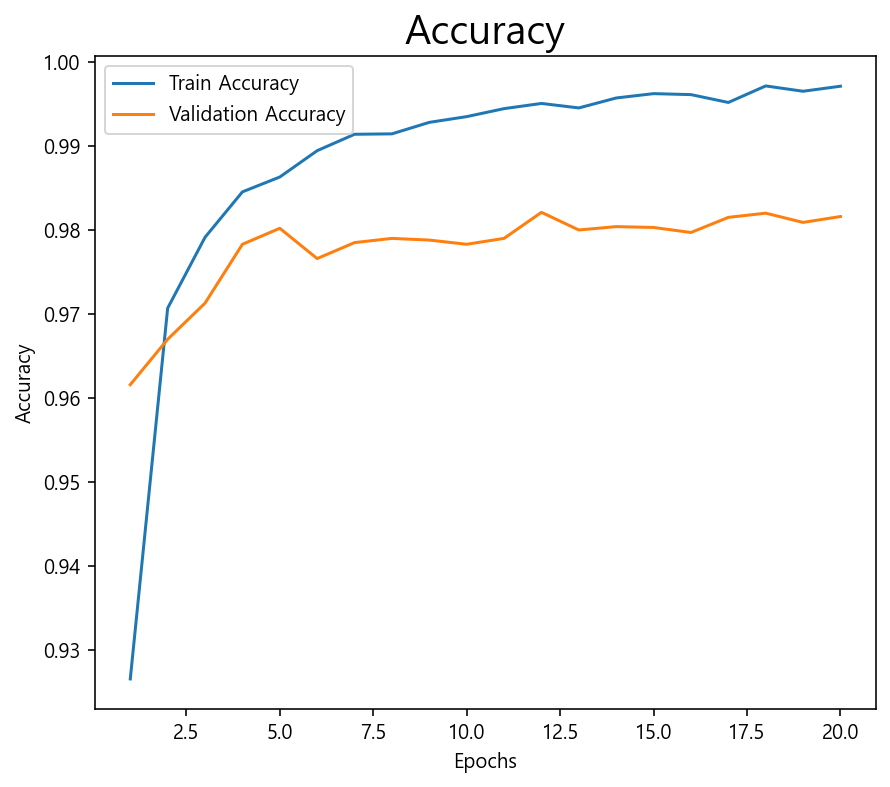

In [32]:
plot_accuracy(N_EPOCHS, hist)

In [33]:
def create_biggest_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=2048, activation='relu'))
    model.add(layers.Dense(units=2048, activation='relu'))
    
    model.add(layers.Dense(units=1024, activation='relu'))
    model.add(layers.Dense(units=1024, activation='relu'))
    
    model.add(layers.Dense(units=512, activation='relu'))
    model.add(layers.Dense(units=512, activation='relu'))
    
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [34]:
model = create_biggest_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

In [35]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 127s 210ms/step - loss: 0.2792 - accuracy: 0.9196 - val_loss: 0.2042 - val_accuracy: 0.9454
Epoch 2/20
600/600 [==============================] - 117s 194ms/step - loss: 0.1244 - accuracy: 0.9682 - val_loss: 0.1314 - val_accuracy: 0.9691
Epoch 3/20
600/600 [==============================] - 113s 188ms/step - loss: 0.0984 - accuracy: 0.9760 - val_loss: 0.1195 - val_accuracy: 0.9681
Epoch 4/20
600/600 [==============================] - 114s 190ms/step - loss: 0.0807 - accuracy: 0.9813 - val_loss: 0.1084 - val_accuracy: 0.9734
Epoch 5/20
600/600 [==============================] - 110s 184ms/step - loss: 0.0692 - accuracy: 0.9837 - val_loss: 0.1010 - val_accuracy: 0.9786
Epoch 6/20
600/600 [==============================] - 110s 183ms/step - loss: 0.0510 - accuracy: 0.9873 - val_loss: 0.1302 - val_accuracy: 0.9751
Epoch 7/20
600/600 [==============================] - 110s 183ms/step - loss: 0.0575 - accuracy: 0.9871 - val_loss: 0.1557 -

### Drop Out 예제
 - dropout 각 레이어에 적용
     - dropout은 layers.Dropout 객체를 사용
     - 객체 생성시 dropout_rate 설정(0.2 ~ 0.5)
     - Drop시킬 노드를 가진 Layer앞에 추가

In [36]:
DROPOUT_RATE = 0.3 #모든 DROPOUT레이어에 동일한 비율을 지정

def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(rate = DROPOUT_RATE)) #학습시에만 작동(검증, test, 새로운 데이터 추론은 적용x)
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(rate = DROPOUT_RATE))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(rate = DROPOUT_RATE))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(rate = DROPOUT_RATE))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(rate = DROPOUT_RATE))
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [37]:
model = create_dropout_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [38]:
N_EPOCHS * DROPOUT_RATE

6.0

In [39]:
#Dropout을 사용하는 경우 Epoch 수를 늘려준다.
#원래 epoch에서 dropout비율을 더한만큼 더 학습을 시킴
hist = model.fit(train_dataset, epochs=N_EPOCHS+6, validation_data=test_dataset)

Epoch 1/26
600/600 [==============================] - 9s 14ms/step - loss: 0.5840 - accuracy: 0.8116 - val_loss: 0.1551 - val_accuracy: 0.9529
Epoch 2/26
600/600 [==============================] - 7s 11ms/step - loss: 0.2647 - accuracy: 0.9239 - val_loss: 0.1223 - val_accuracy: 0.9647
Epoch 3/26
600/600 [==============================] - 6s 10ms/step - loss: 0.2145 - accuracy: 0.9386 - val_loss: 0.0958 - val_accuracy: 0.9718
Epoch 4/26
600/600 [==============================] - 7s 11ms/step - loss: 0.1818 - accuracy: 0.9487 - val_loss: 0.0887 - val_accuracy: 0.9744
Epoch 5/26
600/600 [==============================] - 7s 10ms/step - loss: 0.1619 - accuracy: 0.9542 - val_loss: 0.0868 - val_accuracy: 0.9755
Epoch 6/26
600/600 [==============================] - 7s 11ms/step - loss: 0.1537 - accuracy: 0.9552 - val_loss: 0.0805 - val_accuracy: 0.9772
Epoch 7/26
600/600 [==============================] - 6s 10ms/step - loss: 0.1433 - accuracy: 0.9581 - val_loss: 0.0773 - val_accuracy: 0.9776

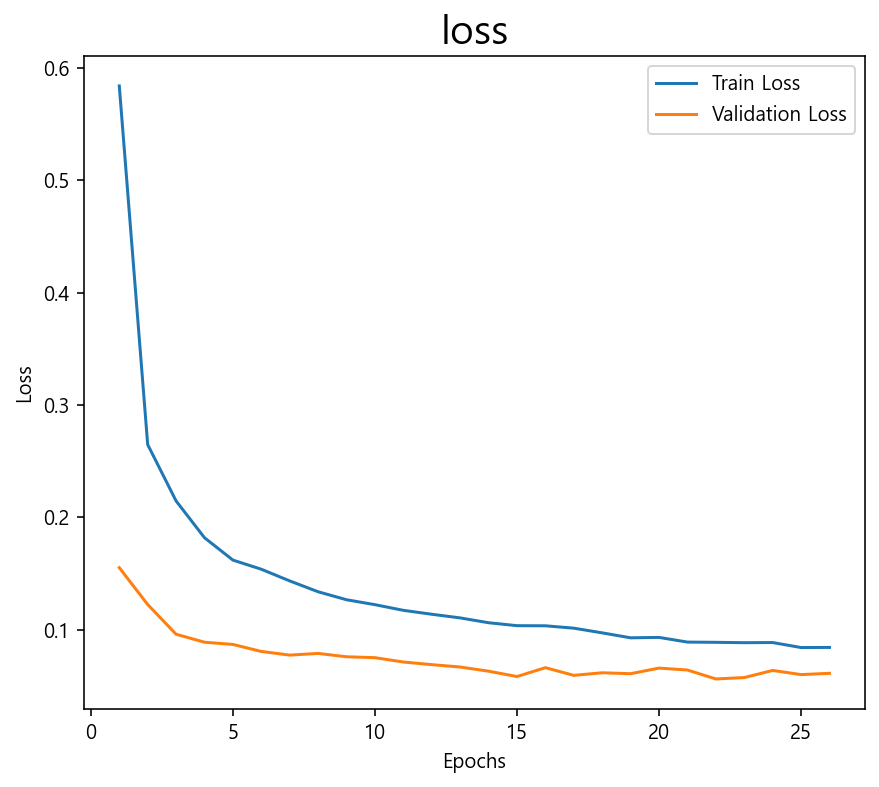

In [40]:
plot_loss(N_EPOCHS+6, hist)

### Batch Normalization

In [49]:
#momentum : z score에 곱해주는 초기값
#scale : z score에 더해주는 초기값
#epsilon : z score계산시 분산값에 더해주는 값 = 0.001

def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))   
    
    model.add(layers.Dense(units=256)) #선형회귀 공식만 계산
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    
    return model

In [50]:
model = create_bn_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
re_lu_12 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
re_lu_13 (ReLU)              (None, 256)              

In [51]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 8s 10ms/step - loss: 0.3870 - accuracy: 0.9365 - val_loss: 0.1880 - val_accuracy: 0.9701
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.1650 - accuracy: 0.9719 - val_loss: 0.1115 - val_accuracy: 0.9774
Epoch 3/20
600/600 [==============================] - 6s 11ms/step - loss: 0.1031 - accuracy: 0.9806 - val_loss: 0.1012 - val_accuracy: 0.9747
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0767 - accuracy: 0.9841 - val_loss: 0.0743 - val_accuracy: 0.9795
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0588 - accuracy: 0.9872 - val_loss: 0.0696 - val_accuracy: 0.9804
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0447 - accuracy: 0.9899 - val_loss: 0.0838 - val_accuracy: 0.9767
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0402 - accuracy: 0.9902 - val_loss: 0.0672 - val_accuracy: 0.9799


ValueError: x and y must have same first dimension, but have shapes (20,) and (26,)

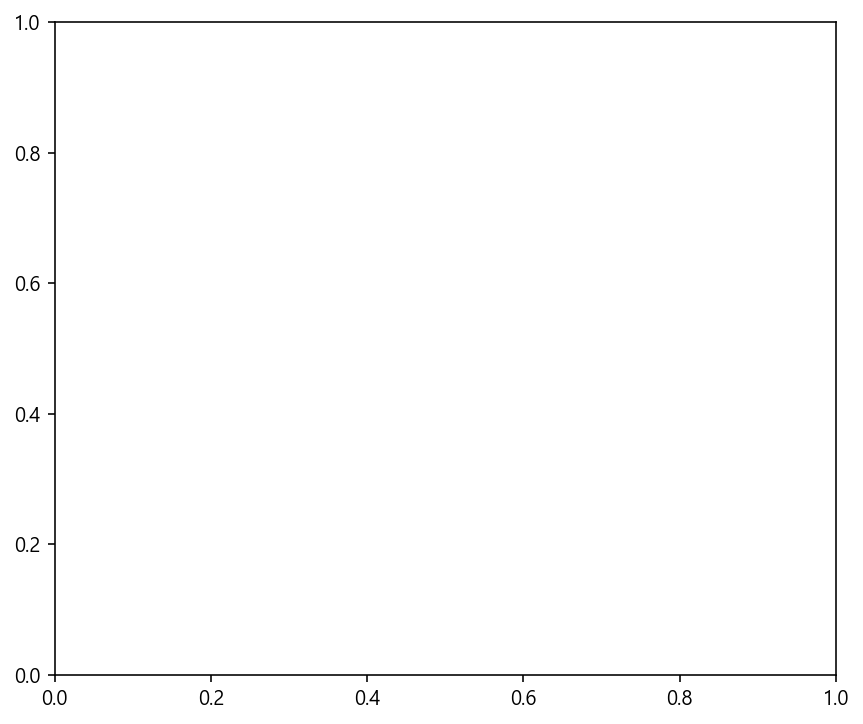

In [45]:
plot_loss(N_EPOCHS, hist)